In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.svm import SVC
from xgboost import plot_importance

In [243]:
#Loading the data
data = pd.read_csv('./dataset_30.csv')
data.head()

having_ip  url_len  shorten  having_at  double_slash  prefix_suffix  \
0         -1        1        1          1            -1             -1   
1          1        1        1          1             1             -1   
2          1        0        1          1             1             -1   
3          1        0        1          1             1             -1   
4          1        0       -1          1             1             -1   

   sub_domain  ssl_final_state  domain_reg_len  favicon  ...  rightclick  \
0          -1               -1              -1        1  ...           1   
1           0                1              -1        1  ...           1   
2          -1               -1              -1        1  ...           1   
3          -1               -1               1        1  ...           1   
4           1                1              -1        1  ...           1   

   popup  iframe  age  dns_record  web_traffic  page_rank  google_index  \
0      1       1   -1          -1           -1         -1             1   
1      1       1   -1          -1            0         -1             1   
2      1       1    1          -1            1         -1             1   
3      1       1   -1          -1            1         -1             1   
4     -1       1   -1          -1            0         -1             1   

   links_to_pointing  Prediction  
0                  1          -1  
1                  1          -1  
2                  0          -1  
3                 -1          -1  
4                  1           1  

[5 rows x 30 columns]

In [244]:
data.shape

(11055, 30)

In [245]:
data.columns

Index(['having_ip', 'url_len', 'shorten', 'having_at', 'double_slash',
       'prefix_suffix', 'sub_domain', 'ssl_final_state', 'domain_reg_len',
       'favicon', 'port', 'https_token', 'req_url', 'url_of_anchor',
       'links_in_tags', 'sfh', 'email_submission', 'abnormal_url', 'redirect',
       'on_mouseover', 'rightclick', 'popup', 'iframe', 'age', 'dns_record',
       'web_traffic', 'page_rank', 'google_index', 'links_to_pointing',
       'Prediction'],
      dtype='object')

In [246]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   having_ip          11055 non-null  int64
 1   url_len            11055 non-null  int64
 2   shorten            11055 non-null  int64
 3   having_at          11055 non-null  int64
 4   double_slash       11055 non-null  int64
 5   prefix_suffix      11055 non-null  int64
 6   sub_domain         11055 non-null  int64
 7   ssl_final_state    11055 non-null  int64
 8   domain_reg_len     11055 non-null  int64
 9   favicon            11055 non-null  int64
 10  port               11055 non-null  int64
 11  https_token        11055 non-null  int64
 12  req_url            11055 non-null  int64
 13  url_of_anchor      11055 non-null  int64
 14  links_in_tags      11055 non-null  int64
 15  sfh                11055 non-null  int64
 16  email_submission   11055 non-null  int64
 17  abnormal_url

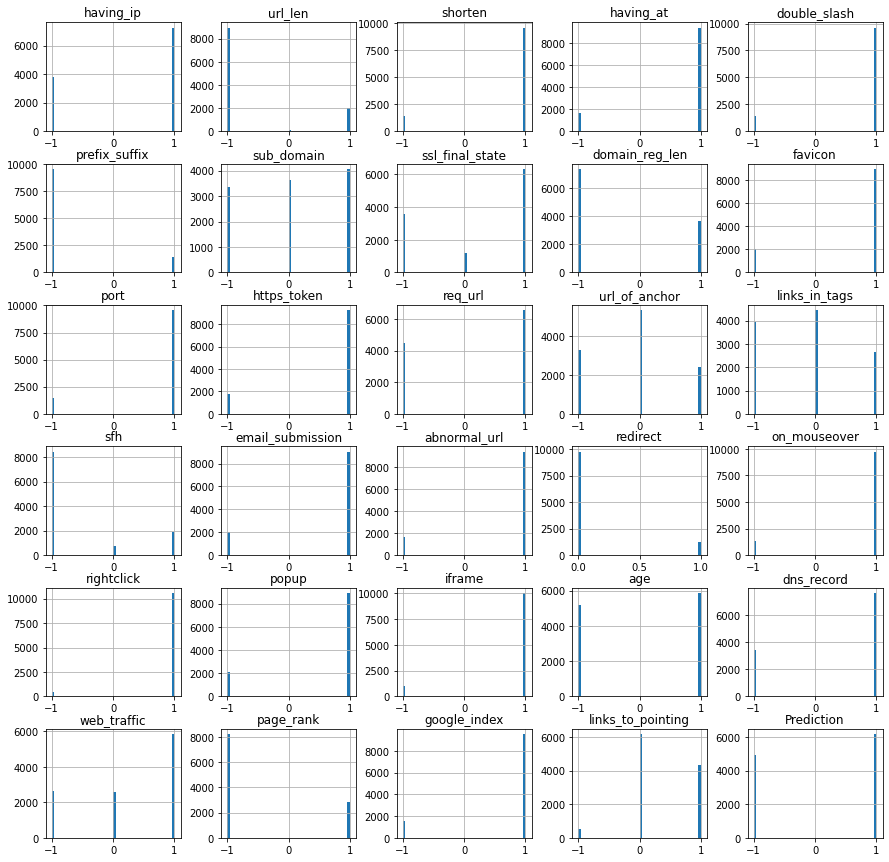

In [247]:
# Data distribution
data.hist(bins = 50,figsize = (15,15))
plt.show()

In [248]:
# Correlation heatmap

plt.figure(figsize=(15,13))
sns.heatmap(data.corr())
plt.show()

In [249]:
data.describe()

having_ip       url_len       shorten     having_at  double_slash  \
count  11055.000000  11055.000000  11055.000000  11055.000000  11055.000000   
mean       0.313795     -0.633198      0.738761      0.700588      0.741474   
std        0.949534      0.766095      0.673998      0.713598      0.671011   
min       -1.000000     -1.000000     -1.000000     -1.000000     -1.000000   
25%       -1.000000     -1.000000      1.000000      1.000000      1.000000   
50%        1.000000     -1.000000      1.000000      1.000000      1.000000   
75%        1.000000     -1.000000      1.000000      1.000000      1.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

       prefix_suffix    sub_domain  ssl_final_state  domain_reg_len  \
count   11055.000000  11055.000000     11055.000000    11055.000000   
mean       -0.734962      0.063953         0.250927       -0.336771   
std         0.678139      0.817518         0.911892        0.941629   
min        -1.000000     -1.000000        -1.000000       -1.000000   
25%        -1.000000     -1.000000        -1.000000       -1.000000   
50%        -1.000000      0.000000         1.000000       -1.000000   
75%        -1.000000      1.000000         1.000000        1.000000   
max         1.000000      1.000000         1.000000        1.000000   

            favicon  ...    rightclick         popup        iframe  \
count  11055.000000  ...  11055.000000  11055.000000  11055.000000   
mean       0.628584  ...      0.913885      0.613388      0.816915   
std        0.777777  ...      0.405991      0.789818      0.576784   
min       -1.000000  ...     -1.000000     -1.000000     -1.000000   
25%        1.000000  ...      1.000000      1.000000      1.000000   
50%        1.000000  ...      1.000000      1.000000      1.000000   
75%        1.000000  ...      1.000000      1.000000      1.000000   
max        1.000000  ...      1.000000      1.000000      1.000000   

                age    dns_record   web_traffic     page_rank  google_index  \
count  11055.000000  11055.000000  11055.000000  11055.000000  11055.000000   
mean       0.061239      0.377114      0.287291     -0.483673      0.721574   
std        0.998168      0.926209      0.827733      0.875289      0.692369   
min       -1.000000     -1.000000     -1.000000     -1.000000     -1.000000   
25%       -1.000000     -1.000000      0.000000     -1.000000      1.000000   
50%        1.000000      1.000000      1.000000     -1.000000      1.000000   
75%        1.000000      1.000000      1.000000      1.000000      1.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

       links_to_pointing    Prediction  
count       11055.000000  11055.000000  
mean            0.344007      0.113885  
std             0.569944      0.993539  
min            -1.000000     -1.000000  
25%             0.000000     -1.000000  
50%             0.000000      1.000000  
75%             1.000000      1.000000  
max             1.000000      1.000000  

[8 rows x 30 columns]

In [250]:
data.isnull().sum()

having_ip            0
url_len              0
shorten              0
having_at            0
double_slash         0
prefix_suffix        0
sub_domain           0
ssl_final_state      0
domain_reg_len       0
favicon              0
port                 0
https_token          0
req_url              0
url_of_anchor        0
links_in_tags        0
sfh                  0
email_submission     0
abnormal_url         0
redirect             0
on_mouseover         0
rightclick           0
popup                0
iframe               0
age                  0
dns_record           0
web_traffic          0
page_rank            0
google_index         0
links_to_pointing    0
Prediction           0
dtype: int64

In [251]:
data2 = data.sample(frac=1).reset_index(drop=True)
data2.head()

having_ip  url_len  shorten  having_at  double_slash  prefix_suffix  \
0          1       -1        1          1             1             -1   
1          1       -1        1          1             1             -1   
2          1       -1        1          1             1             -1   
3          1       -1        1          1             1             -1   
4         -1        1        1         -1             1             -1   

   sub_domain  ssl_final_state  domain_reg_len  favicon  ...  rightclick  \
0           0                1               1        1  ...           1   
1          -1               -1               1       -1  ...          -1   
2          -1                1               1        1  ...           1   
3           1                1              -1        1  ...           1   
4           1               -1              -1        1  ...           1   

   popup  iframe  age  dns_record  web_traffic  page_rank  google_index  \
0      1       1   -1           1            1         -1             1   
1     -1      -1   -1           1           -1         -1             1   
2      1       1    1           1            1         -1             1   
3      1       1    1           1            1         -1             1   
4      1       1   -1           1            0          1             1   

   links_to_pointing  Prediction  
0                  0           1  
1                  0          -1  
2                  0           1  
3                  0           1  
4                  0           1  

[5 rows x 30 columns]

In [252]:
y = data2['Prediction',axis=1]
X = data2.drop('Prediction',axis=1)
X.shape, y.shape

((11055, 29), (11055,))

In [253]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size = 0.8, random_state = 12)
X_train.shape, X_test.shape

((2211, 29), (8844, 29))

In [254]:
ML_Model = []
acc_train = []
acc_test = []

def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

In [255]:
# Decision Tree model 

tree = DecisionTreeClassifier(max_depth = 5)
tree.fit(X_train, y_train)

y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

storeResults('Decision Tree', acc_train_tree, acc_test_tree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))

Decision Tree: Accuracy on training Data: 0.925
Decision Tree: Accuracy on test Data: 0.918


In [256]:
# Feature improtance in Decision Tree

plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_)
plt.yticks(np.arange(n_features))
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [257]:
# Random Forest model

forest = RandomForestClassifier(max_depth=5)
forest.fit(X_train, y_train)

y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

storeResults('Random Forest', acc_train_forest, acc_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))

Random forest: Accuracy on training Data: 0.936
Random forest: Accuracy on test Data: 0.930


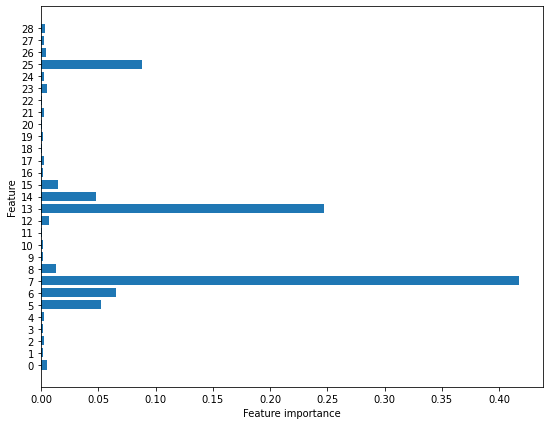

In [258]:
# Feature improtance in Random Forest

plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_)
plt.yticks(np.arange(n_features))
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [259]:
#K Nearest Neighbour Classification

knn = KNeighborsClassifier(n_neighbors =1)
knn.fit(X_train,np.ravel(y_train,order='C'))

y_predict= knn.predict(X_test)

y_test_knn = knn.predict(X_test)
y_train_knn = knn.predict(X_train)
model_score=knn.score(X_test, y_test)

acc_train_knn = accuracy_score(y_train,y_train_knn)
acc_test_knn = accuracy_score(y_test,y_test_knn)

print("KNeighborsClassifier: Accuracy on the Model: ",model_score)
storeResults('KNeighborsClassifier', acc_train_knn, acc_test_knn)

print("KNeighborsClassifier: Accuracy on training Data: {:.3f}".format(acc_train_knn))
print("KNeighborsClassifier: Accuracy on test Data: {:.3f}".format(acc_test_knn))
print(metrics.classification_report(y_test, y_predict))
print(metrics.confusion_matrix(y_test, y_predict))

KNeighborsClassifier: Accuracy on the Model:  0.916214382632293
KNeighborsClassifier: Accuracy on training Data: 0.995
KNeighborsClassifier: Accuracy on test Data: 0.916
              precision    recall  f1-score   support

          -1       0.91      0.90      0.90      3923
           1       0.92      0.93      0.93      4921

    accuracy                           0.92      8844
   macro avg       0.92      0.91      0.91      8844
weighted avg       0.92      0.92      0.92      8844

[[3518  405]
 [ 336 4585]]


In [260]:
# XGBoost Classification model

xgb = XGBClassifier(learning_rate=0.4,max_depth=7)
xgb.fit(X_train, y_train)

y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)

acc_train_xgb = accuracy_score(y_train,y_train_xgb)
acc_test_xgb = accuracy_score(y_test,y_test_xgb)

storeResults('XGBoost', acc_train_xgb, acc_test_xgb)

print("XGBoost: Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost : Accuracy on test Data: {:.3f}".format(acc_test_xgb))

[22:29:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Users\Abby\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBoost: Accuracy on training Data: 0.995
XGBoost : Accuracy on test Data: 0.950


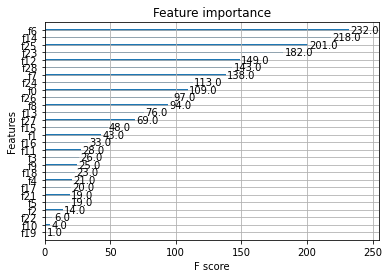

In [261]:
plot_importance(xgb)
plt.show()

In [262]:
# Support vector machine model

svm = SVC(kernel='linear', C=1.0, random_state=12)
svm.fit(X_train, y_train)

y_test_svm = svm.predict(X_test)
y_train_svm = svm.predict(X_train)

acc_train_svm = accuracy_score(y_train,y_train_svm)
acc_test_svm = accuracy_score(y_test,y_test_svm)

storeResults('SVM', acc_train_svm, acc_test_svm)

print("SVM: Accuracy on training Data: {:.3f}".format(acc_train_svm))
print("SVM : Accuracy on test Data: {:.3f}".format(acc_test_svm))

SVM: Accuracy on training Data: 0.930
SVM : Accuracy on test Data: 0.930


In [263]:
results = pd.DataFrame({ 'ML Model': ML_Model, 'Train Accuracy': acc_train, 'Test Accuracy': acc_test})
results

ML Model  Train Accuracy  Test Accuracy
0         Decision Tree           0.925          0.918
1         Random Forest           0.936          0.930
2  KNeighborsClassifier           0.995          0.916
3               XGBoost           0.995          0.950
4                   SVM           0.930          0.930

In [264]:
#Sorting the datafram on accuracy
results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

ML Model  Train Accuracy  Test Accuracy
3               XGBoost           0.995          0.950
1         Random Forest           0.936          0.930
4                   SVM           0.930          0.930
0         Decision Tree           0.925          0.918
2  KNeighborsClassifier           0.995          0.916

In [265]:
# XGBoost model to file
import pickle
pickle.dump(xgb, open("xgb.pkl", "wb"))